#6. Convolution#

In this notebook we do a convolution "by hand", by doing the flipping and shifting implied in the definition of the convolution.

(Althought this notebook will work in notebook version 0.12 (nbversion 2), the animation is much smoother in notebook version 2.x +)

First import the necessary modules:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import time 
from IPython.core.display import clear_output
from IPython.core.display import display

The definition of a convolution is:

$$ g(t) * h(t) = \int_{-\infty}^\infty g(x) \cdot h(t-x) dx $$

The basic steps of convolution defined in the equation:
* flip: $h(-x)$
* shift: $h(t-x)$
* multiply: $g(x)h(t-x)$

These steps are repeated over the whole interval $(-\infty, \infty)$

The discrete version of the convolution, for function h and g with a finite number of elements, is:

$$ g[n] * h[n] = \sum_{m=-M}^M g[m] h[n-m] $$

where g[m] has support over m=-M to M.

##Simple Impulse##

To demonstrate how convolution works consider 2 impulse functions. We use impulse functions because the math is simple.

$$g(x) = \left\{\begin{array}{rcl} 1 & if & x=2 \\ 2 & if & x=4 \\ 0 & otherwise & \end{array} \right. $$
and
$$f(x) = \left\{\begin{array}{rcl} 1 & if & x=-1 \\ 1 & if & x=1 \\ 0 & otherwise & \end{array} \right. $$

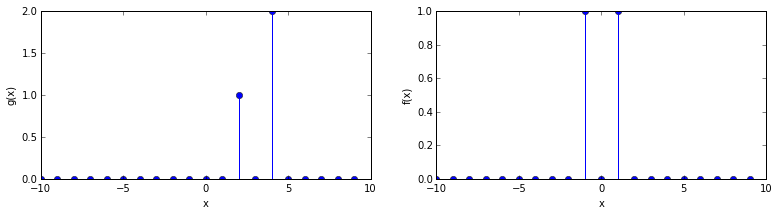

In [2]:
x = np.arange(-10,10,1)
g = np.zeros(x.shape)
g[len(x)/2 + 2] = 1
g[len(x)/2 + 4] = 2
f = np.zeros(x.shape)
f[len(x)/2 - 1] = 1
f[len(x)/2 + 1] = 1

# create plot
fig, ax = plt.subplots(1,2,figsize=[13,3])
# plot the new component on the left, the sum on the right
ax[0].stem(x,g)
ax[0].set_xlabel('x')
ax[0].set_ylabel('g(x)')
ax[1].stem(x,f)
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')

Remember that the convolution product is associated with the shift parameter $u$. The results of convolving the 2 functions above is shown

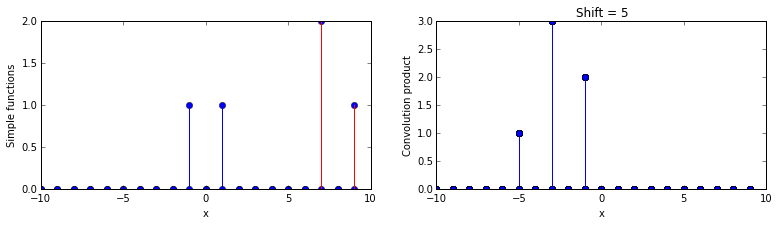

In [4]:
# create plot
fig, ax = plt.subplots(1,2,figsize=[13,3])

# flip
g_flip = g
g_flip[len(x)/2 + 2] = 2
g_flip[len(x)/2 + 4] = 1
zero_offset = np.argmin(abs(x))
integral=np.zeros(x.shape)
for offset_i in range(len(x)-4):
    offset=x[offset_i]
# shift
    shift=offset_i-zero_offset
    g_shifted = np.roll(g_flip, shift)
# multiply
    product = g_shifted * f
    integral[offset_i] = sum(product)
    
    # plot the new component on the left, the sum on the right
    ax[0].stem(x,f,'b')
    ax[0].stem(x,g_shifted,'r')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('Simple functions')

    ax[1].stem(x,integral)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('Convolution product')
    ax[1].set_title('Shift = %d'%shift)

    # show the plot, then get ready for the next plot
    plt.draw()
    time.sleep(2.0)
    clear_output(wait=True)
    display(fig)
    ax[0].cla()
    
plt.close()

Obviously using more complex functions will result in more complex convolution results

##More Complicated Example##

Create x-axis array for our functions:

In [5]:
n = np.arange(-15.,16.,1.)
Ng = len(n)
Nh = len(n)

Lets create some simple functions to convolve. You can change this to create your own functions later.

In [6]:
g = np.zeros(Ng)
h = np.zeros(Nh)

g[8] = 5.
g[9] = 4.
g[10] = 3.5
g[11] = 3.
g[12] = 2.5
g[13] = 3.
g[14] = 3.5
g[15] = 4.

h[16] = -2.
h[17] = -2.
h[18] = -2.
h[19] = 1.
h[20] = 1.
h[21] = 1.
h[22] = 1.
h[23] = 1.

Plot our functions:

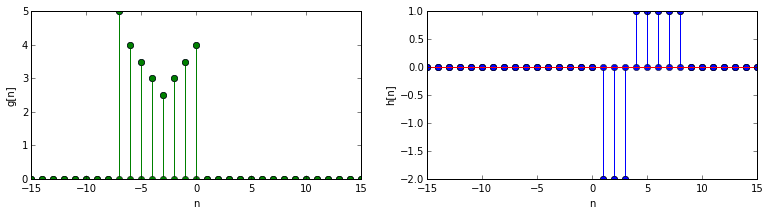

In [7]:
fig, ax1 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax1[0].stem(n,g,'g-o')
ax1[0].set_xlabel('n')
ax1[0].set_ylabel('g[n]')

ax1[1].stem(n,h,'b-o')
ax1[1].set_xlabel('n')
ax1[1].set_ylabel('h[n]')

Lets determine the convolution of g and h from the definition.
<br/>
First flip h around:

In [8]:
h_flipped = np.zeros(Nh)

for i in np.arange(0,Nh,1):
    h_flipped[i] = h[(Nh-1)-i]

And plot g and h_flipped:

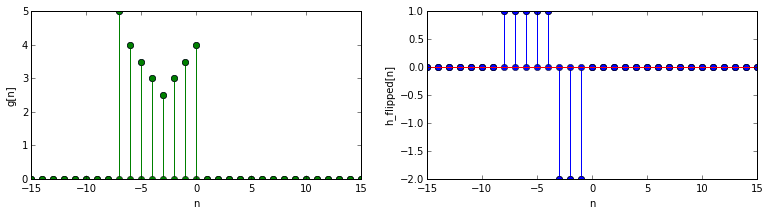

In [9]:
fig, ax1 = plt.subplots(1,2,figsize=[13,3])     # create plot

ax1[0].stem(n,g,'g-o')
ax1[0].set_xlabel('n')
ax1[0].set_ylabel('g[n]')

ax1[1].stem(n,h_flipped,'b-o')
ax1[1].set_xlabel('n')
ax1[1].set_ylabel('h_flipped[n]')

Lets set the limits for our convolution.

We want to watch the convolution being performed as we shift our functions over each other. So in this example we will perform the convolution over the full overlap range of the two functions.

In [10]:
min_conv_n = min(n)-Ng/2
max_conv_n = max(n)+Ng/2
conv_n_range = np.arange(min_conv_n,max_conv_n+1,1)

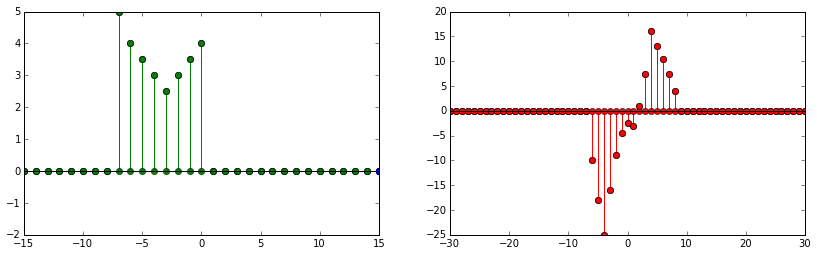

In [11]:
# set the time step to be longer if you want there to be a longer pause between plots
time_step = 0.01

# create plot to track our convolution
fig, ax = plt.subplots(1,2,figsize=[14,4])    

# create our array to put the results on the convolution into
conv = [] 

# now shift h_flipped over g, and multiply
for cn in conv_n_range:
    
    # use index k to track the overlap
    # in terms of convolution shift, k=0 corresponds to the maximum h index shifted to the minimum g index
    #   i.e. t=15 shifted to t=-15 
    k = int(cn)+30
  
    # work out min and max indices of the "shifting" function h
    if k<=(Nh-1):
        h_low = (Nh-1)-k
    else:
        h_low = 0
    
    if k<(Ng-1):
        h_high = Nh-1
    else:
        h_high = (Nh-1)-(k-(Ng-1))
        
    # work out min and max indices of the "static" function g
    if k<=(Nh-1):
       g_high = (Ng-1) - h_low 
    else:
       g_high = Ng-1

    if k<(Ng-1):
        g_low = 0
    else:
        g_low = (Ng-1) - h_high
        
    # the indices that overlap between the two for this shift:
    h_indices = np.arange(h_low, h_high+1) 
    g_indices = np.arange(g_low, g_high+1)
    
    # multiply the overlapping function region together, index by index
    multiply_array = np.zeros(len(h_indices))
    for i, [gi, hi] in enumerate(zip(g_indices,h_indices)):
        multiply_array[i] = g[gi] * h_flipped[hi]
      
    # sum over thultiplied values and put into our convolution array  
    conv.append(sum(multiply_array))    
    
    # plot the shifted functions
    ax[0].stem(n,g,'g-o',basefmt='k-')
    ax[0].stem(np.arange(len(h_indices))+n[0]+g_low,h_flipped[h_indices],'b-o',basefmt='') 
    ax[0].set_ylim(min(min(g),min(h)),max(max(g),max(h)))
        
    # plot the convolution as is builds up
    ax[1].stem(np.arange(min_conv_n,cn+1),conv,'r-o',basefmt='k-')
    ax[1].set_xlim(min_conv_n,max_conv_n)
    
    # show the plot, then get ready for the next plot
    plt.draw()
    time.sleep(time_step)
    clear_output(wait=True)
    display(fig)
    ax[0].cla()
    ax[1].cla()
    
plt.close()

Lets check this against the numpy convolve function:

In [12]:
# we use mode full to convolve over the full extent of the functions, as we did above
numpy_conv = np.convolve(g,h,mode='full')

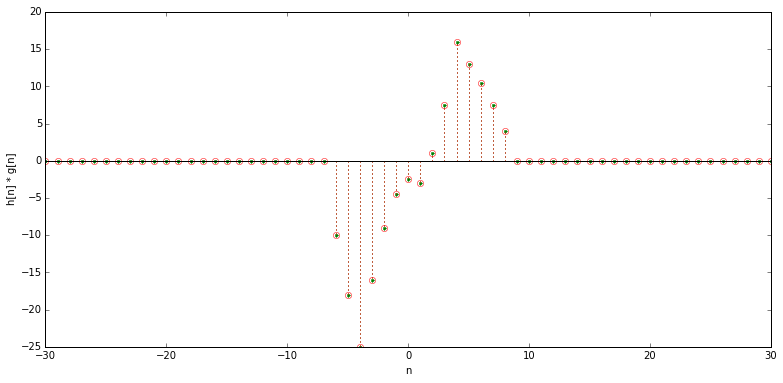

In [13]:
# create plot
fig, ax = plt.subplots(1,1,figsize=[13,6])

ax.stem(conv_n_range,numpy_conv,linefmt='g:',markerfmt='g.',basefmt='k-')
markerline, stemlines, baseline = ax.stem(conv_n_range,conv,linefmt='r:',markerfmt='ro',basefmt='k-')
plt.setp(markerline, 'fillstyle', 'none')

ax.set_xlabel('n')
ax.set_ylabel('h[n] * g[n]')

In the plot above, the numpy convolution is green points and the convolution we calculated manually is open red cirrcles - which overlap.

##Fun Examples##

The following examples are shown on wikipedia:
http://en.wikipedia.org/wiki/Convolution

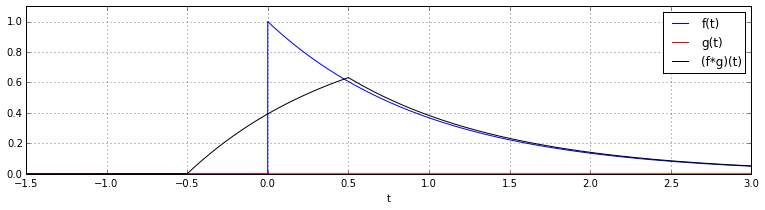

In [15]:
# create plot
fig, ax = plt.subplots(figsize=[13,3])

# Create folding of two rectangular impulses with spiky function
X = np.arange(-2.3, 3.8, 0.0005)
F1= np.exp(-X)
F1[X<=0] = 0
F2=np.zeros(X.shape)
F2[abs(X)<=0.5] = 1
 
zero_offset = np.argmin(abs(X))

integral=np.zeros(X.shape) #np.empty(X.shape)*np.nan
for offset_i in range(len(X)):
    offset=X[offset_i]
    shift=offset_i-zero_offset
    F2_shifted = np.roll(F2, shift)
    product = F2_shifted*F1
    integral[offset_i] = np.sum(product)/len(X)*(X[-1]-X[0])
    if (np.mod(offset_i, 30)==0):
        ax.fill_between(X, 0, product, color="yellow", alpha=0.5)
        plt.hold(True)
        ax.plot(X, F1, 'b', X, F2_shifted, 'r', X, integral, 'k', [offset, offset], [0, 2], 'k:')
        plt.hold(False)
        ax.set_ylim([0, 1.1])
        ax.set_xlim([-1.5, 3])
        ax.set_xlabel('t')
        ax.legend(['f(t)', 'g(t)', '(f*g)(t)'])
        ax.grid(True)
        # show the plot, then get ready for the next plot
        plt.draw()
        time.sleep(0.01)
        clear_output(wait=True)
        display(fig)
        ax.cla()
    
plt.close()

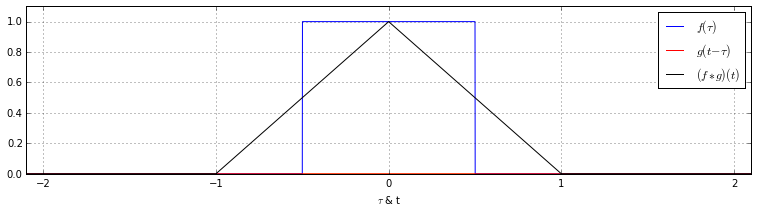

In [16]:
# Create folding of two rectangular impulses
fig, ax = plt.subplots(figsize=[13,3])
X= np.arange(-2.6,3,0.001)
F1=np.zeros(X.shape)
F1[abs(X)<=0.5] = 1
F2=F1
zero_offset = np.argmin(abs(X))
SyncFrames = np.ones(X.shape)
SyncFrames[1:] = np.round(18.67*np.arange(1,len(X)))

integral=np.zeros(X.shape)
frame=1;
for offset_i in range(len(X)):
    offset=X[offset_i]
    shift=offset_i-zero_offset
    F2_shifted = np.roll(F2, shift)
    product = F2_shifted*F1
    integral[offset_i] = np.sum(product)/len(X)*(X[-1]-X[0])
 
    if offset_i==SyncFrames[frame]:
        frame=frame+1
        ax.fill_between(X, 0, product, color="yellow", alpha=0.5)
        plt.hold(True)
        ax.plot(X, F1, 'b', X, F2_shifted, 'r', X, integral, 'k', [offset, offset], [0, 2], 'k:')
        plt.hold(False)
        ax.set_xlim([-2.1, 2.1])
        ax.set_ylim([0., 1.1])
        ax.set_xlabel(r'$\tau$ & t')
        ax.grid(True)
        ax.legend([r'$f(\tau)$', r'$g(t-\tau)$', r'$(f\ast g)(t)$'])
        # show the plot, then get ready for the next plot
        plt.draw()
        time.sleep(0.01)
        clear_output(wait=True)
        display(fig)
        ax.cla()
    
plt.close()

###Version information###

In [17]:
import os, sys
import numpy
import matplotlib
import IPython

print 'OS:          ', os.name, sys.platform
print 'Python:      ', sys.version.split()[0]
print 'IPython:     ', IPython.__version__
print 'Numpy:       ', numpy.__version__
print 'matplotlib:  ', matplotlib.__version__

OS:           posix linux2
Python:       2.7.6
IPython:      3.2.0-dev
Numpy:        1.9.0
matplotlib:   1.4.3
